# Image Filtering - Gaussian Smoothing

## Packages ##

Let's first import all the packages that you will need.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python. here we want to just display our image array.
- PIL is package for working with image, in this project we use it to read and get the output image

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### Here we get the image and convert it into the 2D array

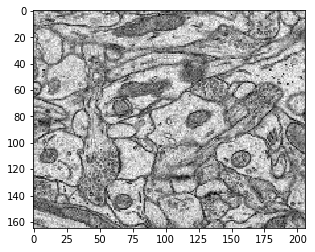

In [11]:
img = Image.open('test-img.pgm')
input_img = np.array(img)
plt.imshow(input_img,plt.cm.gray)
plt.show()

### We want to filter an image with gaussian filtering:
$$f(x,y) = A * e^{- (\frac{(x-x_0)^2}{2sigma_x^2})+\frac{(y-y_0)^2}{2sigma_y^2})} $$
 
where $x_0=y_0=0$ and $sigma_x = sigma_y$ so we have:

$$f(x,y) = A * e^{- (\frac{(x-y)^2}{2sigma^2}) }$$

In [12]:
filter_size = 5
sigma = 1
gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
m = filter_size//2
n = filter_size//2

#### here we just calculate the gaussian filter mask once and then apply it to all the picture

(1.0, <matplotlib.image.AxesImage at 0x7fdfd2c6dbd0>)

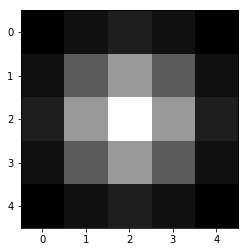

In [13]:
for x in range(-m, m+1):
    for y in range(-n, n+1):
        x1 = 2*np.pi*(sigma**2)
        x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
        gaussian_filter[x+m, y+n] = (1/x1)*x2
gaussian_filter = gaussian_filter/np.sum(gaussian_filter)      
gaussian_filter.sum(),plt.imshow(gaussian_filter,plt.cm.gray)

##### We use convolution to apply the filter to image (there are several ways to do the convolution), first we zero padding the image, then we scan and apply the filter and finaly crop the original size of the image

In [14]:
img_pad = np.pad(input_img, pad_width=((m, m),(n, n)), mode='constant', constant_values=0).astype(np.float32)
img_pad.shape

(169, 210)

In [15]:
img_conv = np.zeros(img_pad.shape)
img_conv.shape

(169, 210)

 $$X_{lm} =   \sum_{s=-a}^{a}\sum_{t=-b}^{b} w(s,t)f(i-s,j-t) $$

In [16]:
for i in range(m, img_pad.shape[0]-m):
    for j in range(n, img_pad.shape[1]-n):
        #sum = 0
        x = img_pad[i-m:i-m+filter_size, j-n:j-n+filter_size]
        x = x.flatten()*gaussian_filter.flatten()
        img_conv[i][j] = x.sum()

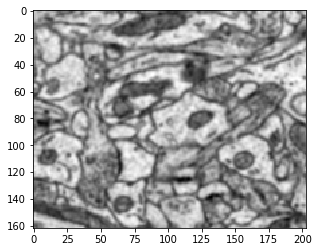

In [17]:
#crop the image to get the original image
org_img=img_conv[m+1:input_img.shape[0],n+1:input_img.shape[1]]
plt.imshow(org_img,plt.cm.gray)